In [0]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
Training_identity=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Creditcard/train_identity.csv')
Training_transaction=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Creditcard/train_transaction.csv')

In [0]:
Test_identity=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Creditcard/test_identity.csv')
Test_transaction=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Creditcard/test_transaction.csv')

In [13]:
training=pd.merge(Training_transaction,Training_identity,on='TransactionID',how='left')
training.shape

(590540, 434)

In [14]:
test=pd.merge(Test_transaction,Test_identity,on='TransactionID',how='left')
test.shape

(506691, 433)

In [0]:
#Reduce the memory
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                  df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: 
        print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [17]:
train=reduce_mem_usage(training)
test=reduce_mem_usage(test)

Mem. usage decreased to 650.48 Mb (66.8% reduction)
Mem. usage decreased to 565.37 Mb (66.3% reduction)


In [0]:
del Training_identity,Training_transaction,Test_identity,Test_transaction

In [19]:
#Recognize categorical and numerical attributes¶
cat_cols = list(train.select_dtypes(include=['object']).columns)
cat_cols

['ProductCD',
 'card4',
 'card6',
 'P_emaildomain',
 'R_emaildomain',
 'M1',
 'M2',
 'M3',
 'M4',
 'M5',
 'M6',
 'M7',
 'M8',
 'M9',
 'id_12',
 'id_15',
 'id_16',
 'id_23',
 'id_27',
 'id_28',
 'id_29',
 'id_30',
 'id_31',
 'id_33',
 'id_34',
 'id_35',
 'id_36',
 'id_37',
 'id_38',
 'DeviceType',
 'DeviceInfo']

In [22]:

null_percent = train.isnull().sum()/train.shape[0]*100
cols_to_drop = np.array(null_percent[null_percent > 50].index)
cols_to_drop

array(['dist1', 'dist2', 'R_emaildomain', 'D5', 'D6', 'D7', 'D8', 'D9',
       'D12', 'D13', 'D14', 'M5', 'M7', 'M8', 'M9', 'V138', 'V139',
       'V140', 'V141', 'V142', 'V143', 'V144', 'V145', 'V146', 'V147',
       'V148', 'V149', 'V150', 'V151', 'V152', 'V153', 'V154', 'V155',
       'V156', 'V157', 'V158', 'V159', 'V160', 'V161', 'V162', 'V163',
       'V164', 'V165', 'V166', 'V167', 'V168', 'V169', 'V170', 'V171',
       'V172', 'V173', 'V174', 'V175', 'V176', 'V177', 'V178', 'V179',
       'V180', 'V181', 'V182', 'V183', 'V184', 'V185', 'V186', 'V187',
       'V188', 'V189', 'V190', 'V191', 'V192', 'V193', 'V194', 'V195',
       'V196', 'V197', 'V198', 'V199', 'V200', 'V201', 'V202', 'V203',
       'V204', 'V205', 'V206', 'V207', 'V208', 'V209', 'V210', 'V211',
       'V212', 'V213', 'V214', 'V215', 'V216', 'V217', 'V218', 'V219',
       'V220', 'V221', 'V222', 'V223', 'V224', 'V225', 'V226', 'V227',
       'V228', 'V229', 'V230', 'V231', 'V232', 'V233', 'V234', 'V235',
       '

In [23]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop,axis=1)
train.columns

Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=220)

In [24]:
#Include fake data with mode¶
null_cols = train.columns[train.isna().any()].tolist()

for i in null_cols:
    print('data type of {} is {}'.format(i, str(train[i].dtype)))
    train[i] = train[i].replace(np.nan, train[i].mode()[0])
    print('Filled the null values of column {}'.format(i))
    print('--------------------------------------------')

data type of card2 is float16
Filled the null values of column card2
--------------------------------------------
data type of card3 is float16
Filled the null values of column card3
--------------------------------------------
data type of card4 is object
Filled the null values of column card4
--------------------------------------------
data type of card5 is float16
Filled the null values of column card5
--------------------------------------------
data type of card6 is object
Filled the null values of column card6
--------------------------------------------
data type of addr1 is float16
Filled the null values of column addr1
--------------------------------------------
data type of addr2 is float16
Filled the null values of column addr2
--------------------------------------------
data type of P_emaildomain is object
Filled the null values of column P_emaildomain
--------------------------------------------
data type of D1 is float16
Filled the null values of column D1
------------

In [25]:
null_cols=test.columns[test.isna().any()].tolist()

for i in null_cols:
  print('data type of {} is {} '.format(i,str(train[i].dtype)))
  test[i]=test[i].replace(np.nan,test[i].mode()[0])
  print('Filled null values of columns{}'.format(i))
  print('----------------------')

data type of card2 is float16 
Filled null values of columnscard2
----------------------
data type of card3 is float16 
Filled null values of columnscard3
----------------------
data type of card4 is object 
Filled null values of columnscard4
----------------------
data type of card5 is float16 
Filled null values of columnscard5
----------------------
data type of card6 is object 
Filled null values of columnscard6
----------------------
data type of addr1 is float16 
Filled null values of columnsaddr1
----------------------
data type of addr2 is float16 
Filled null values of columnsaddr2
----------------------
data type of P_emaildomain is object 
Filled null values of columnsP_emaildomain
----------------------
data type of C1 is float16 
Filled null values of columnsC1
----------------------
data type of C2 is float16 
Filled null values of columnsC2
----------------------
data type of C3 is float16 
Filled null values of columnsC3
----------------------
data type of C4 is float16

In [0]:
#Use LabelEncoder to change text to int¶
x_train=train.drop('isFraud',axis=1)
y_train=train['isFraud']

In [29]:
categorical=x_train.select_dtypes(include='object')
numerical=x_train.select_dtypes(exclude='object')

cat_cols=categorical.columns.values
num_cols=numerical.columns.values

print('categorical columns:',cat_cols)
print('Numerical columns:',num_cols)

categorical columns: ['ProductCD' 'card4' 'card6' 'P_emaildomain' 'M1' 'M2' 'M3' 'M4' 'M6']
Numerical columns: ['TransactionID' 'TransactionDT' 'TransactionAmt' 'card1' 'card2' 'card3'
 'card5' 'addr1' 'addr2' 'C1' 'C2' 'C3' 'C4' 'C5' 'C6' 'C7' 'C8' 'C9'
 'C10' 'C11' 'C12' 'C13' 'C14' 'D1' 'D2' 'D3' 'D4' 'D10' 'D11' 'D15' 'V1'
 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13' 'V14'
 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25' 'V26'
 'V27' 'V28' 'V29' 'V30' 'V31' 'V32' 'V33' 'V34' 'V35' 'V36' 'V37' 'V38'
 'V39' 'V40' 'V41' 'V42' 'V43' 'V44' 'V45' 'V46' 'V47' 'V48' 'V49' 'V50'
 'V51' 'V52' 'V53' 'V54' 'V55' 'V56' 'V57' 'V58' 'V59' 'V60' 'V61' 'V62'
 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70' 'V71' 'V72' 'V73' 'V74'
 'V75' 'V76' 'V77' 'V78' 'V79' 'V80' 'V81' 'V82' 'V83' 'V84' 'V85' 'V86'
 'V87' 'V88' 'V89' 'V90' 'V91' 'V92' 'V93' 'V94' 'V95' 'V96' 'V97' 'V98'
 'V99' 'V100' 'V101' 'V102' 'V103' 'V104' 'V105' 'V106' 'V107' 'V108'
 'V109' 'V110' 'V11

In [0]:
x_train['TransactionAmt']=x_train['TransactionAmt'].apply(np.log)
test['TransactionAmt']=test['TransactionAmt'].apply(np.log)

In [36]:
for i in tqdm(cat_cols):
  label=LabelEncoder()
  label.fit(list(x_train[i].values) + list(test[i].values))
  x_train[i]=label.transform(list(x_train[i].values))
  test[i]=label.transform(list(test[i].values))
  
  
  

100%|██████████| 9/9 [00:06<00:00,  1.70it/s]


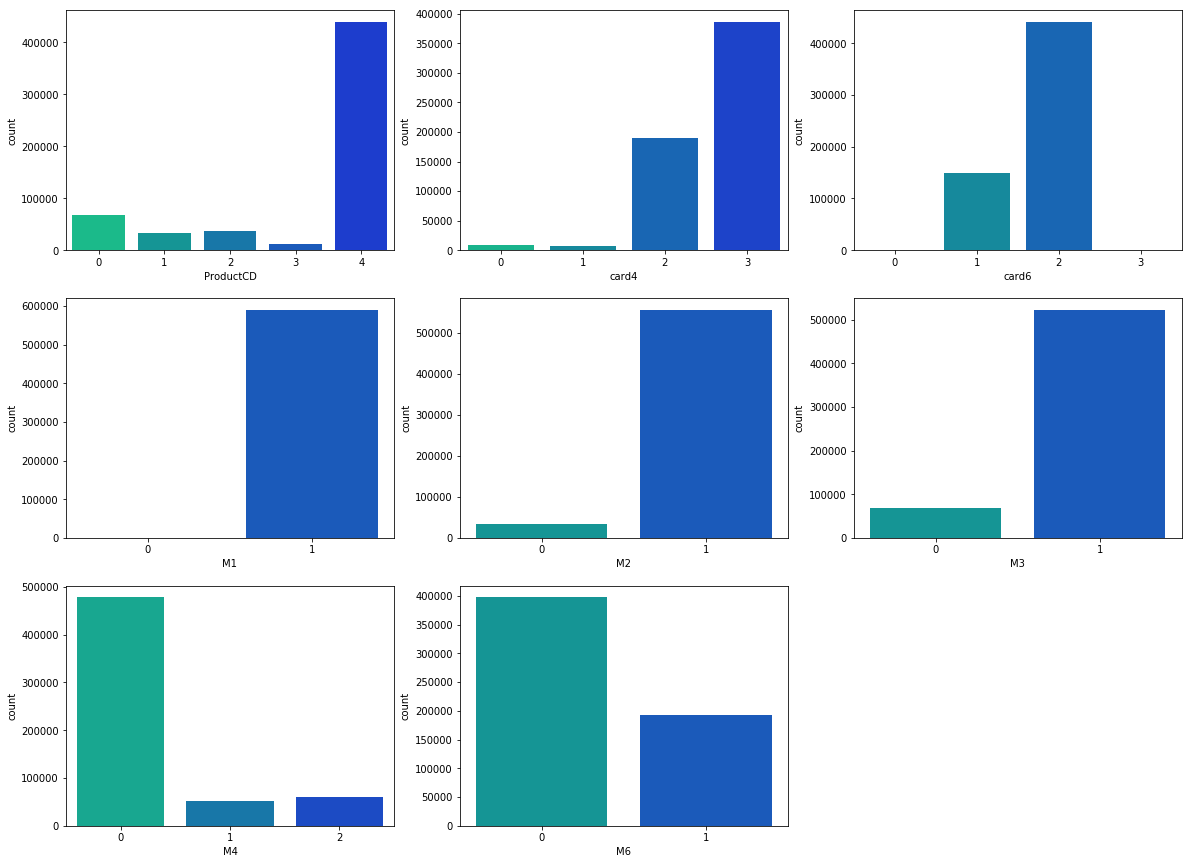

In [37]:
fig = plt.figure(figsize=(20,15))

j = 1
for i in cat_cols:
    if(i == 'P_emaildomain'):
        continue
    plt.subplot(3,3,j)
    sns.countplot(x=x_train[i], palette='winter_r')
    j = j + 1
    
plt.show()

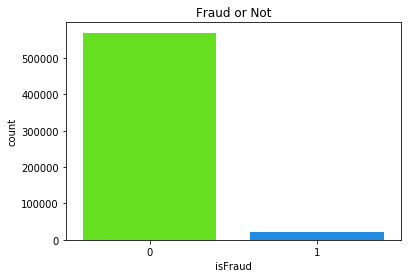

In [38]:
sns.countplot(x=y_train, palette='gist_rainbow')
plt.title('Fraud or Not')
plt.show()

In [0]:
## This is a datetime column.
x_train_final = x_train.drop('TransactionDT', axis=1)
test_final = test.drop('TransactionDT', axis=1)

In [41]:
#create Logistic regression
from sklearn import linear_model
filename = 'model.pkl'
logistic_model = linear_model.LogisticRegression(C=0.09,solver='lbfgs',class_weight='balanced')  
logistic_model.fit(x_train_final, y_train)
import pickle
pickle.dump(logistic_model, open(filename, 'wb'))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [0]:
#create  the prediction
logistic_predictions = logistic_model.predict(test_final)


In [43]:
score = logistic_model.score(x_train_final, y_train)
print(score)

0.4509601381786162


In [44]:
#create submit value
sub = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Creditcard/sample_submission.csv')
sub['isFraud'] = logistic_predictions
sub.head()

,TransactionID,isFraud
0,3663549,0
1,3663550,0
2,3663551,0
3,3663552,0
4,3663553,1


In [0]:
sub.to_csv('submission.csv', index=False)